### Exploratory Data Analysis of penguins size

#### Import necessary libraries

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

#### Read the data 

In [3]:
data = pd.read_csv("./penguins_size.csv")

In [4]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Basic information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### Find the missing values in the data

In [6]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

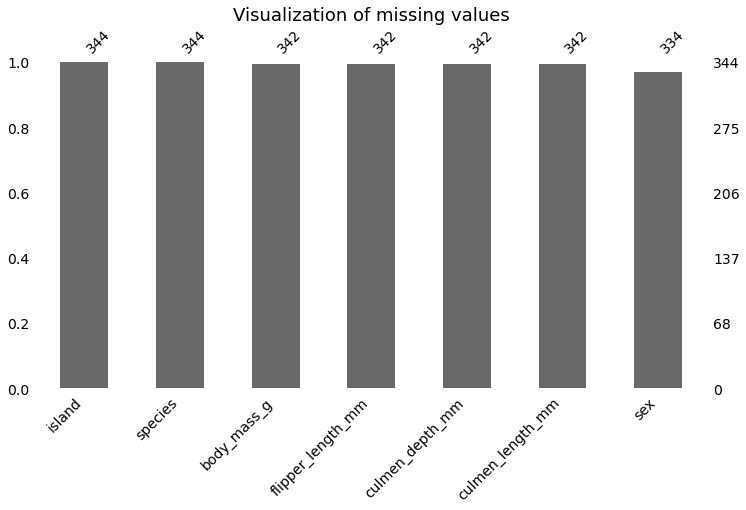

In [7]:
missingno.bar(data, fontsize = 14, sort='descending',figsize=(12,6))
plt.title("Visualization of missing values", fontsize=18)
plt.show()

#### Check for duplicates

In [8]:
data.duplicated().sum()

0

In [13]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [19]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Count of sex types

In [20]:
data['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [21]:
data['sex'].nunique()

3

In [22]:
data['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [23]:
data['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [24]:
idx = data[data['sex'].isna()].index

In [25]:
data.loc[idx,'sex']="NA"

In [26]:
idx = data[data['sex'].str.contains('min')].index

In [27]:
idx

Int64Index([], dtype='int64')

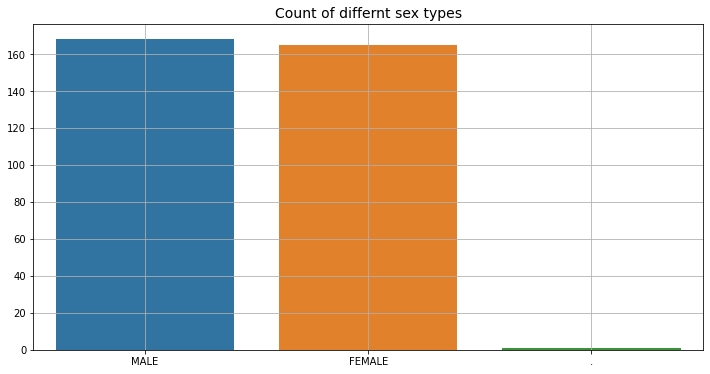

In [7]:
plt.figure(figsize = (12,6))
sns.barplot(x = data['sex'].value_counts().index, y = data['sex'].value_counts().values)
plt.grid()
plt.title("Count of differnt sex types", fontsize = 14)
plt.show()

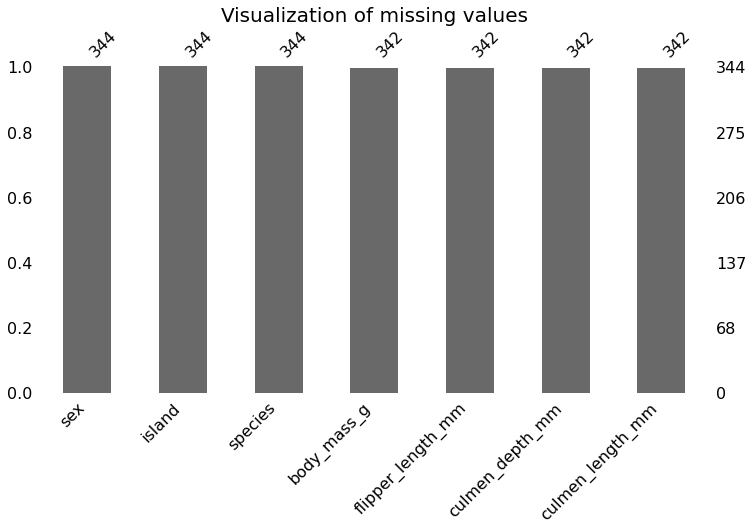

In [30]:
missingno.bar(data, fontsize=16, sort='descending', figsize=(12,6))
plt.title("Visualization of missing values", fontsize=20)
plt.show()

#### island distibution

In [31]:
data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [33]:
x = data['island'].value_counts()

In [34]:
x

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

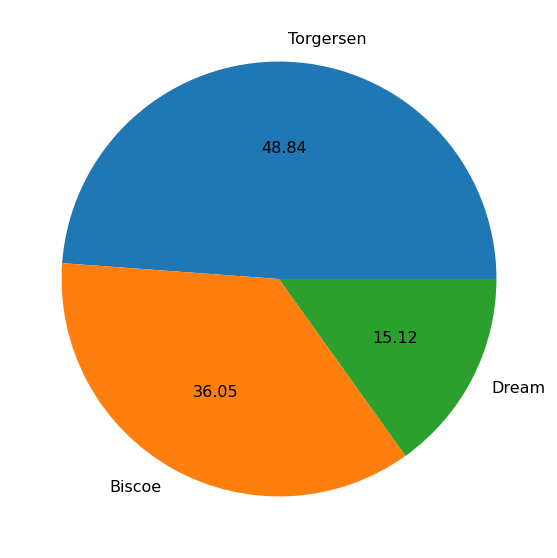

In [38]:
plt.figure(figsize=(10,10))
wedges, titles, perc = plt.pie(x, normalize=True, labels=data['island'].unique(), autopct='%0.2f') 
for t in titles:
    t.set_fontsize("16")
for p in perc:
    p.set_fontsize("16")
plt.show()

#### Species

In [39]:
data['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [40]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
data['species'].nunique()

3

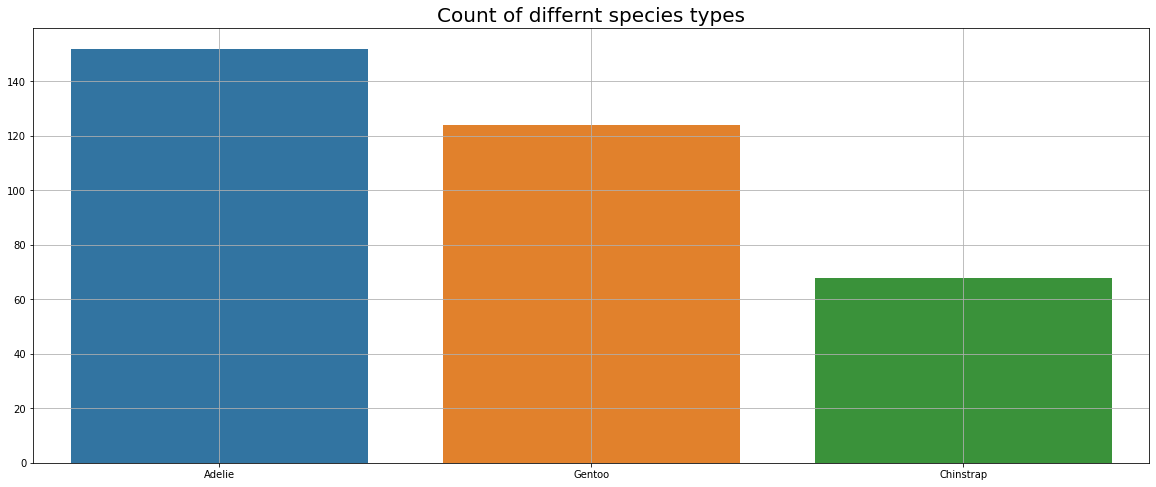

In [10]:
plt.figure(figsize = (20,8))
sns.barplot(x = data['species'].value_counts().index, y = data['species'].value_counts().values)
plt.grid()
plt.title("Count of differnt species types", fontsize = 20)
plt.show()

#### Body mass 

C:\Users\RAMAKANT MISHRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


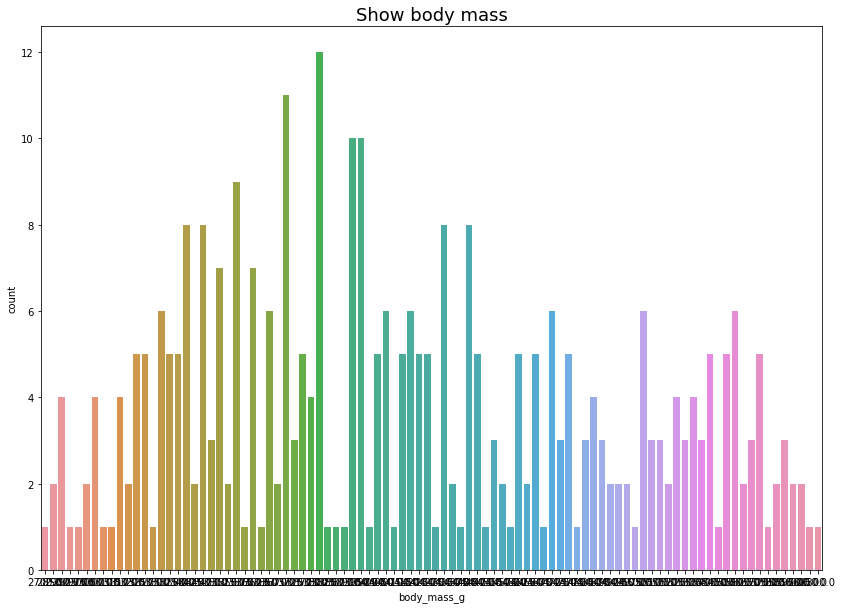

In [11]:
plt.figure(figsize=(14,10))
sns.countplot(data['body_mass_g'])
plt.title("Show body mass", fontsize = 18)
plt.show()

In [12]:
data['culmen_length_mm'].nunique()

164

In [13]:
data['culmen_length_mm'].value_counts()

41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: culmen_length_mm, Length: 164, dtype: int64

In [5]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### culmen_length_mm

In [7]:
data['culmen_length_mm'].nunique()

164

In [8]:
data['culmen_length_mm'].min(), data['culmen_length_mm'].max()

(32.1, 59.6)

In [9]:
data['culmen_length_mm'].mean()

43.92192982456142

In [10]:
data['culmen_length_mm'].median()

44.45

In [12]:
data['culmen_length_mm'].std()

5.459583713926532

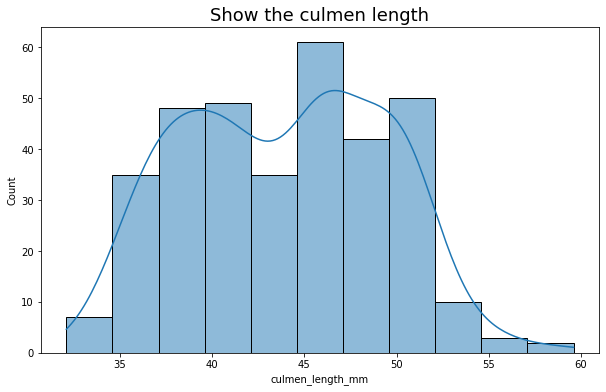

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['culmen_length_mm'], kde=True)
plt.title("Show the culmen length", fontsize = 18)
plt.show()

#### culmen_depth_mm

In [15]:
data['culmen_depth_mm'].nunique()

80

In [16]:
data['culmen_depth_mm'].value_counts()

17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: culmen_depth_mm, Length: 80, dtype: int64

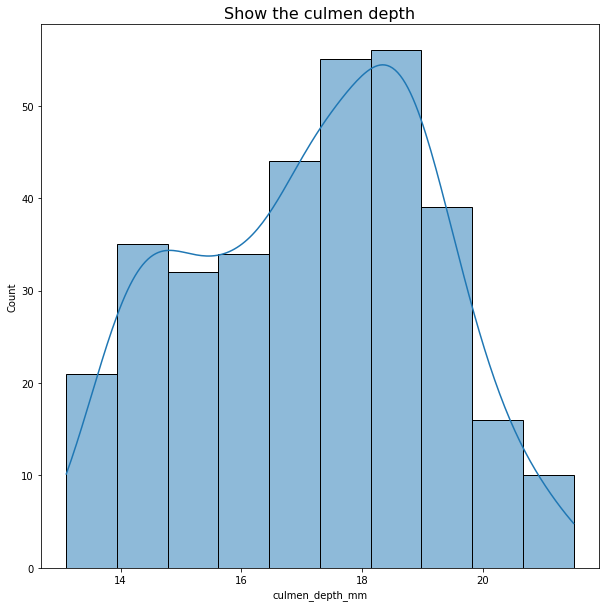

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x=data['culmen_depth_mm'], kde=True)
plt.title("Show the culmen depth", fontsize = 16)
plt.show()

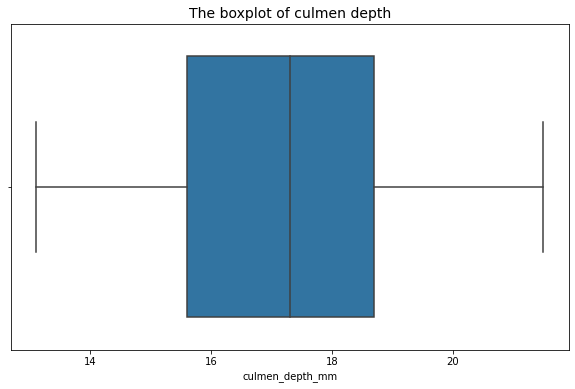

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='culmen_depth_mm')
plt.title("The boxplot of culmen depth", fontsize=14)
plt.show()

#### flipper length

In [22]:
data['flipper_length_mm'].nunique()

55

In [27]:
data['flipper_length_mm'].max(), data['flipper_length_mm'].min()

(231.0, 172.0)

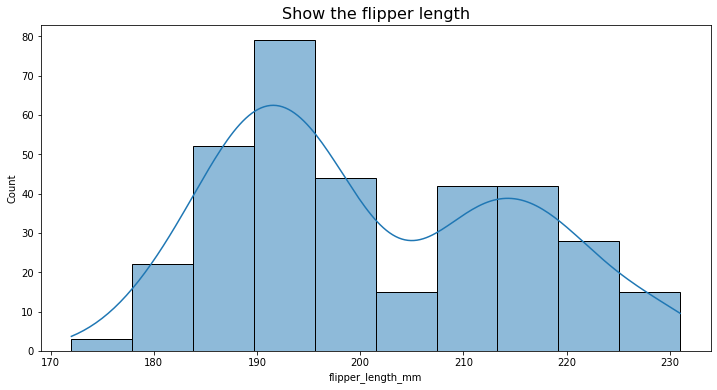

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data =data, x='flipper_length_mm', kde = True)
plt.title("Show the flipper length", fontsize = 16)
plt.show()

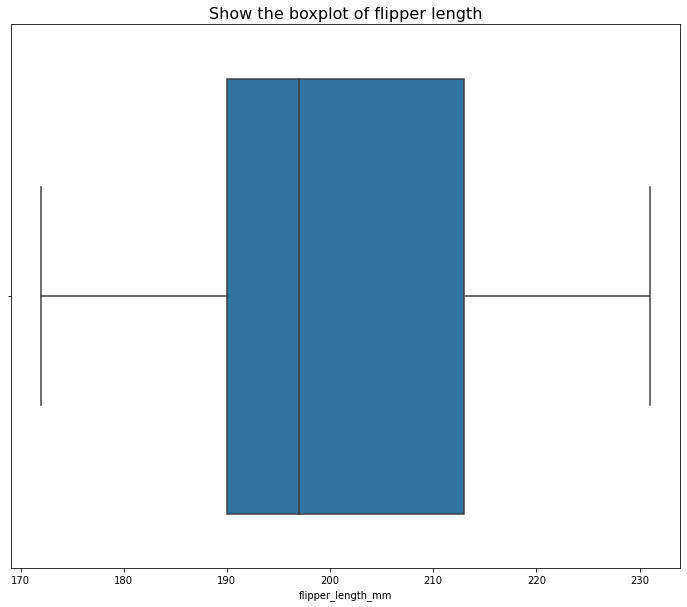

In [32]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data, x='flipper_length_mm')
plt.title("Show the boxplot of flipper length", fontsize = 16)
plt.show()